# Forecasting

Ardina Shaifa Ramadhany <br>
23031554027

In [1]:
pip install yfinance


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

### PT Semen Indonesia (Persero) Tbk (SMGR.JK)

In [2]:
data = yf.download("SMGR.JK", start="2024-03-26", end="2025-03-26")
data.to_csv("SMGR_historical.csv")

print("Download selesai!")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Download selesai!


In [3]:
df_smgr = pd.read_csv("SMGR_historical.csv", skiprows=2)  
df_smgr.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

df_smgr["Date"] = pd.to_datetime(df_smgr["Date"])

df_smgr.head()

,Date,Close,High,Low,Open,Volume
0,2024-03-26,5532.102051,5555.743513,5437.536204,5555.743513,8430900
1,2024-03-27,5603.026367,5626.667829,5484.819060,5532.101983,9001800
2,2024-03-28,5579.385254,5626.668180,5508.460865,5603.026717,8128800
3,2024-04-01,5555.743164,5579.384624,5390.252942,5579.384624,7557200
4,2024-04-02,5461.177734,5508.460658,5413.894810,5508.460658,7609100


### PT XL Axiata Tbk (EXCL.JK)

In [4]:
data = yf.download("EXCL.JK", start="2024-03-26", end="2025-03-26")
data.to_csv("XL_historical.csv")

print("Download selesai!")

[*********************100%***********************]  1 of 1 completed

Download selesai!


In [5]:
df_xl = pd.read_csv("XL_historical.csv", skiprows=2)  
df_xl.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

df_xl["Date"] = pd.to_datetime(df_xl["Date"])

df_xl.head()

,Date,Close,High,Low,Open,Volume
0,2024-03-26,2253.631592,2310.208117,2253.631592,2310.208117,17637200
1,2024-03-27,2149.907715,2281.919592,2074.472356,2281.919592,90965400
2,2024-03-28,2131.048828,2159.337087,2112.189989,2149.907667,16894400
3,2024-04-01,2140.478516,2168.766778,2093.331412,2131.049095,44328600
4,2024-04-02,2168.766602,2187.625442,2121.619502,2159.337182,26378000


# Eksplorasi Data

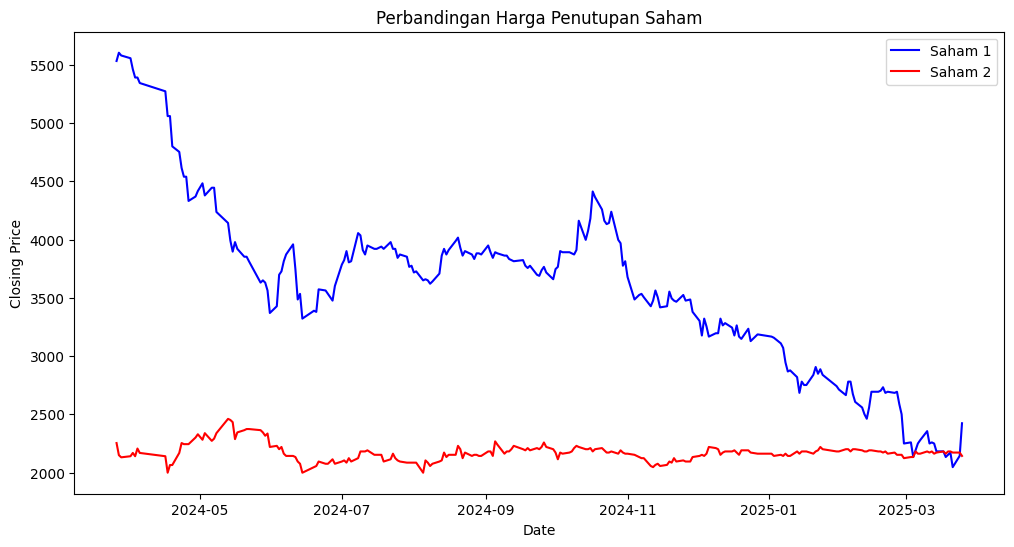

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df_smgr["Date"], df_smgr["Close"], label="Saham 1", color='blue')
plt.plot(df_xl["Date"], df_xl["Close"], label="Saham 2", color='red')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Perbandingan Harga Penutupan Saham")
plt.legend()
plt.show()

- Saham PT Semen Indonesia (Persero) Tbk (SMGR.JK) atau data saham 1 menunjukkan tren penurunan signifikan. Harga saham ini awalnya cukup tinggi (sekitar 5500) tetapi mengalami penurunan bertahap hingga di bawah 2500.
- Saham 1 memiliki volatilitas yang tinggi, terlihat dari pergerakan harga yang cukup tajam dengan beberapa lonjakan dan penurunan yang besar
- Saham 1 terlihat tidak stasioner <br><br>
- Saham PT XL Axiata Tbk (EXCL.JK) atau data saham 2 lebih stabil dibandingkan saham 1 dengan fluktuasi yang lebih kecil dan berada dalam kisaran harga sekitar 2000-2500
- Saham 2 memiliki volatilitas yang lebih rendah, terlihat dari perubahan harga yang tidak terlalu ekstrem.
- Saham 2 terlhat stasioner

### Statistika Deskriptif

In [7]:
print("\nStatistik Saham 1:")
df_smgr.describe()


Statistik Saham 1:


,Date,Close,High,Low,Open,Volume
count,238,238.000000,238.000000,238.000000,238.000000,2.380000e+02
mean,2024-09-28 17:02:31.260504320,3569.608207,3647.770680,3524.821273,3589.461312,2.007805e+07
min,2024-03-26 00:00:00,2046.890137,2162.751936,2027.579815,2075.855652,3.218900e+06
25%,2024-07-05 18:00:00,3169.300476,3234.472634,3147.576434,3195.852049,8.718050e+06
50%,2024-09-28 12:00:00,3693.091919,3760.677986,3639.988778,3693.091985,1.293015e+07
75%,2024-12-22 06:00:00,3910.332764,3977.918766,3881.367201,3917.573999,2.179455e+07
max,2025-03-25 00:00:00,5603.026367,5626.668180,5508.460865,5603.026717,2.904497e+08
std,NaN,717.340206,722.002680,718.469955,723.992098,2.501755e+07


Rata-rata harga penutupan saham (close) PT Semen Indonesia (Persero) Tbk (SMGR.JK) sebesar 3697.105712 dengan std deviasi sebesar 742.961803 yang tergolong besar dibandingkan saham 2 artinya saham 1 lebih fluktuatif/ lebih volatile

In [8]:
print("\nStatistik Saham 2:")
df_xl.describe()


Statistik Saham 2:


,Date,Close,High,Low,Open,Volume
count,238,238.000000,238.000000,238.000000,238.000000,2.380000e+02
mean,2024-09-28 17:02:31.260504320,2170.814844,2203.736961,2147.740137,2176.819303,2.259516e+07
min,2024-03-26 00:00:00,1998.974487,2075.858154,1961.319349,1998.974582,2.570500e+06
25%,2024-07-05 18:00:00,2133.520996,2162.352257,2114.299893,2135.260351,1.246802e+07
50%,2024-09-28 12:00:00,2171.962646,2191.183697,2152.741808,2171.962787,1.797470e+07
75%,2024-12-22 06:00:00,2198.391357,2220.015061,2179.170475,2200.794077,2.835088e+07
max,2025-03-25 00:00:00,2461.078613,2498.796518,2385.643468,2470.508256,1.507367e+08
std,NaN,72.280998,74.927355,68.268617,73.300845,1.681328e+07


Rata-rata harga penutupan saham (close) PT XL Axiata Tbk (EXCL.JK) sebesar 2258.805618 dengan std deviasi sebesar 75.210790 lebih kecil dibandingkan saham 1 artinya saham 2 cenderung stabil

In [9]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### uji stasioner (ADF test)

In [10]:
def check_stationarity(data):
    result = adfuller(data)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Data stasioner")
    else:
        print("Data tidak stasioner")

check_stationarity(df_smgr["Close"])
check_stationarity(df_xl["Close"])

ADF Statistic: -2.276968529172269
p-value: 0.17950369488606738
Data tidak stasioner
ADF Statistic: -2.9794099090204313
p-value: 0.03686251110168486
Data stasioner


pada hasil di atas didapatkan bahwa data **df_xl stasioner** sedangkan **df_smgr tidak stasioner** sehingga diperlukan differencing (d)

### Differencing (d)

differencing untuk df_smgr **(d=1)**

ADF Statistic: -14.132033813334175
p-value: 2.3245995302261707e-26
Data stasioner


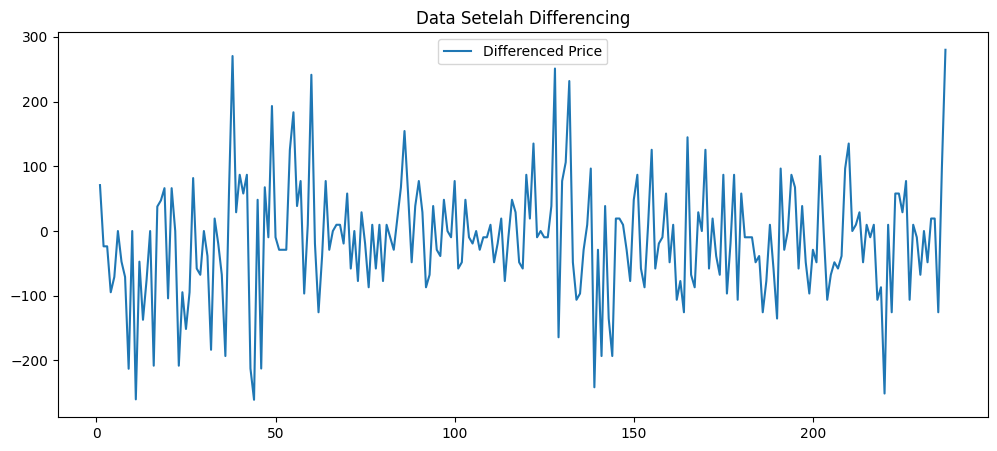

In [11]:
df_smgr["Close_diff"] = df_smgr["Close"].diff()
check_stationarity(df_smgr["Close_diff"].dropna())

plt.figure(figsize=(12,5))
plt.plot(df_smgr["Close_diff"], label="Differenced Price")
plt.title("Data Setelah Differencing")
plt.legend()
plt.show()

### ACF & PACF

##### df_smgr sebelum differencing

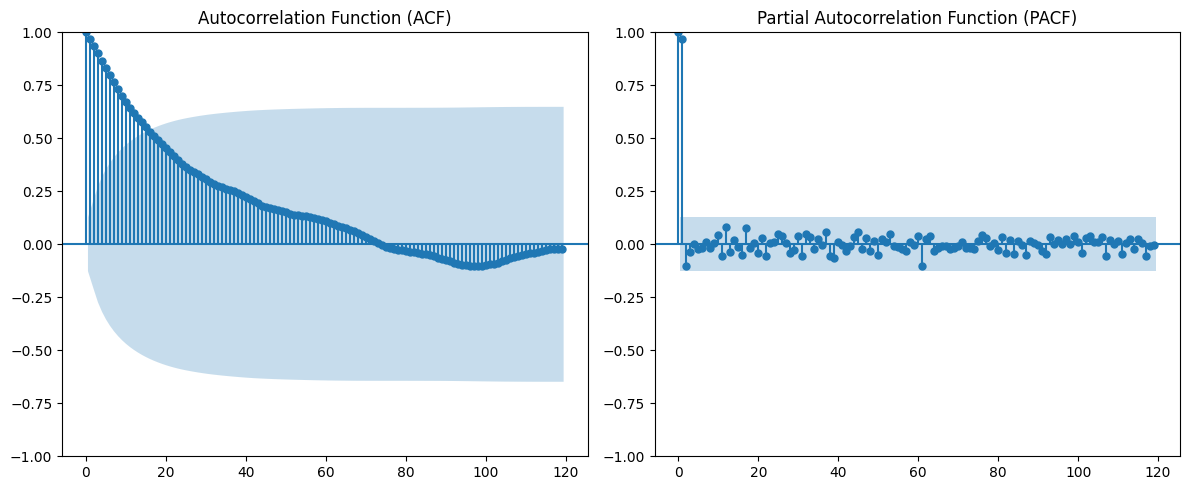

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df_smgr["Close"].dropna(), lags=119, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(df_smgr["Close"].dropna(), lags=119, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()  
plt.show()

##### df_xl

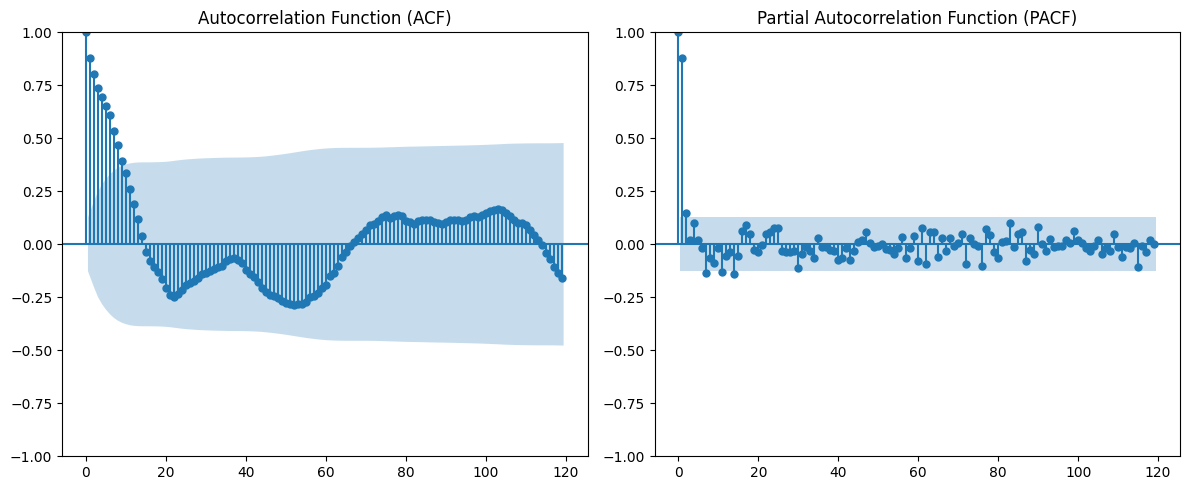

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df_xl["Close"].dropna(), lags=119, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(df_xl["Close"].dropna(), lags=119, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()  
plt.show()

PACF = tidak ada lonjakan setelah lag 2 maka **p = 2** <br>
ACF = ada lonjakan setelah lag 1, lag 7, dan lag 10 maka **q = 7** (dicoba satu satu)

##### df_smgr sesudah differencing

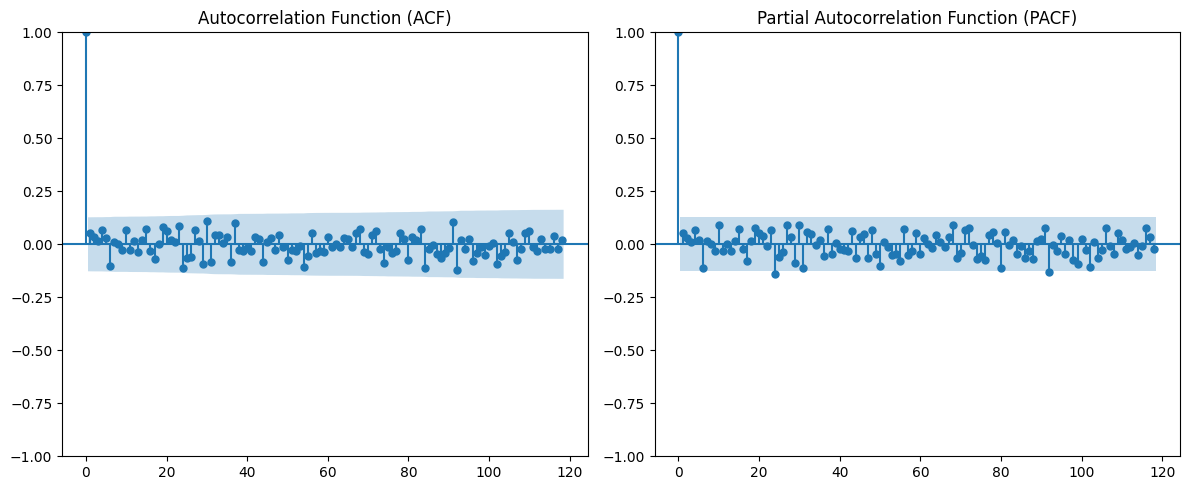

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df_smgr["Close_diff"].dropna(), lags=118, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(df_smgr["Close_diff"].dropna(), lags=118, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()  
plt.show()

PACF = tidak ada lonjakan setelah lag 1 maka **p = 1** <br>
ACF = tidak ada lonjakan setelah lag 1 maka **q = 1**

# Train Model

### df_smgr data semen gresik

karena saya bingung datanya seasonal atau tidak, dan plotnya tidak terlalu menunjukkan data seasonal atau tidak secara signifikan, maka saya mencoba dua model yakni ARIMA (p, d, q) dan SARIMA (p, d, q, m)

#### ARIMA (p, d, q) = (1, 1, 1)

In [15]:
df_smgrmodel = df_smgr.copy()  

# Split data 80% training, 20% testing
train_size = int(len(df_smgrmodel) * 0.8)
train, test = df_smgrmodel[:train_size], df_smgrmodel[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 190, Test size: 48


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  190
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1119.730
Date:                Fri, 06 Jun 2025   AIC                           2245.460
Time:                        22:42:05   BIC                           2255.185
Sample:                             0   HQIC                          2249.400
                                - 190                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9437      0.065     14.577      0.000       0.817       1.071
ma.L1         -0.8960      0.089    -10.045      0.000      -1.071      -0.721
sigma2      8178.5577    687.915     11.889      0.0

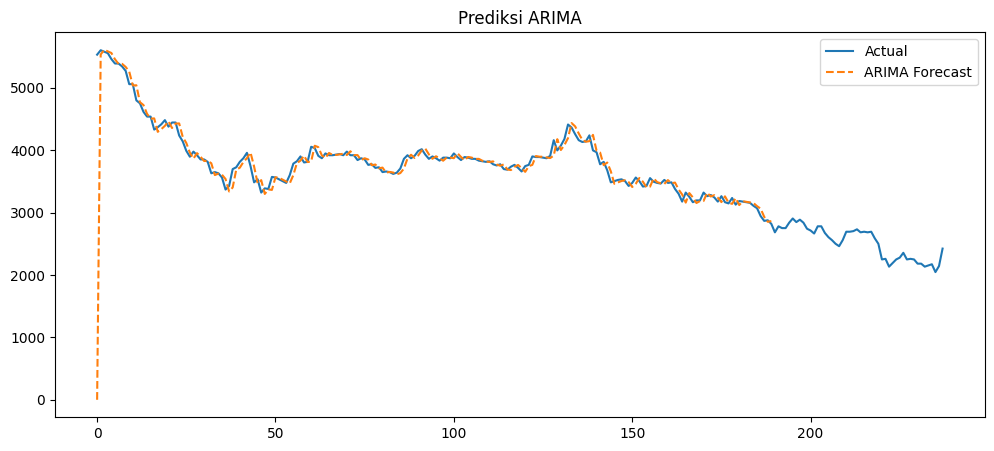

In [16]:
model = ARIMA(train["Close"], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

df_smgrmodel["Forecast_ARIMA"] = model_fit.fittedvalues

plt.figure(figsize=(12,5))
plt.plot(df_smgrmodel["Close"], label="Actual")
plt.plot(df_smgrmodel["Forecast_ARIMA"], label="ARIMA Forecast", linestyle="dashed")
plt.title("Prediksi ARIMA")
plt.legend()
plt.show()


forecasting untuk data test

Mean Absolute Error (MAE): 190.97
Root Mean Squared Error (RMSE): 248.22


C:\Users\USER\AppData\Local\Temp\ipykernel_6936\1405784888.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecast_ARIMA"] = test_forecast


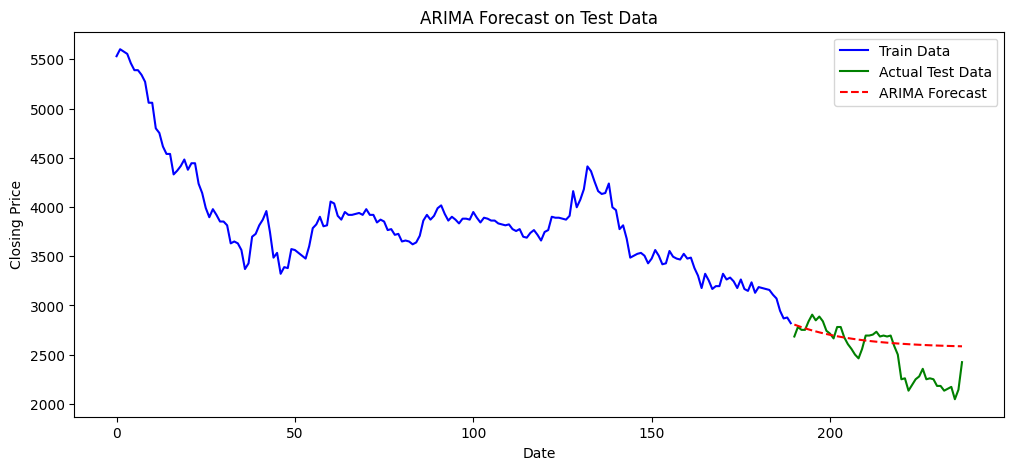

In [17]:
test_forecast = model_fit.forecast(steps=len(test))

# Evaluasi performa model
mae = mean_absolute_error(test["Close"], test_forecast)
rmse = np.sqrt(mean_squared_error(test["Close"], test_forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Tambahkan hasil forecast ke dataframe test
test["Forecast_ARIMA"] = test_forecast

plt.figure(figsize=(12,5))
plt.plot(train["Close"], label="Train Data", color="blue")
plt.plot(test["Close"], label="Actual Test Data", color="green")
plt.plot(test["Forecast_ARIMA"], label="ARIMA Forecast", linestyle="dashed", color="red")
plt.legend()
plt.title("ARIMA Forecast on Test Data")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

didapatkan hasil untuk model ARIMA (p, d, q): <br> <br>
**Mean Absolute Error (MAE): 199.41** <br>
**Root Mean Squared Error (RMSE): 259.92**

#### SARIMA (p, d ,q ,m) = (1, 1, 1, 7)

In [18]:
df_smgrmodel = df_smgr.copy()  

# Split data 80% training, 20% testing
train_size = int(len(df_smgrmodel) * 0.8)
train, test = df_smgrmodel[:train_size], df_smgrmodel[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 190, Test size: 48


menggunakan parameter yang sesuai yakni m=7 karena data harian, dan pola berulang setiap minggu (7 hari).

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  190
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1034.529
Date:                           Fri, 06 Jun 2025   AIC                           2079.058
Time:                                   22:42:47   BIC                           2094.824
Sample:                                        0   HQIC                          2085.454
                                           - 190                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9155      0.286     -3.205      0.001      -1.475      -0.356
ma.L1          1.0961      0.348      3.150

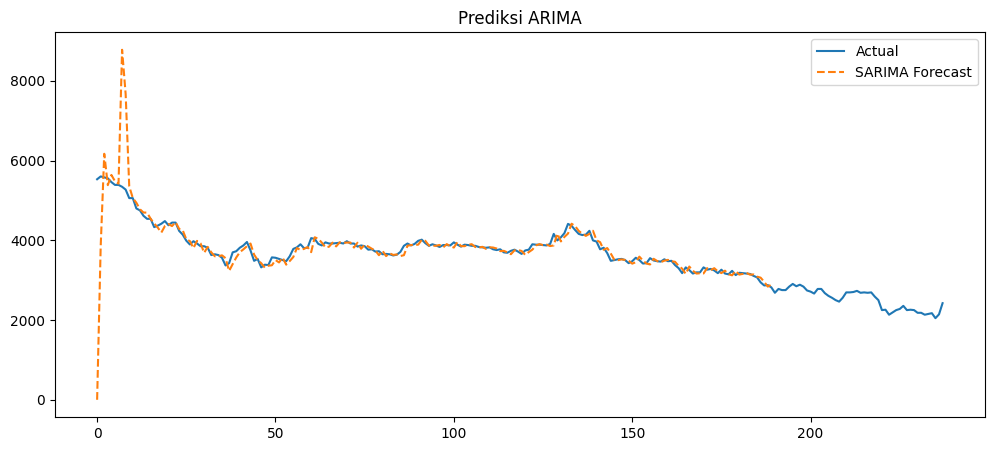

In [19]:
sarima_model = SARIMAX(train["Close"], 
                       order=(1,1,1),              # Parameter ARIMA (p,d,q)
                       seasonal_order=(1,1,1,7),   # Parameter musiman (P,D,Q,m)
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

sarima_fit = sarima_model.fit()

print(sarima_fit.summary())

df_smgrmodel["Forecast_SARIMA"] = sarima_fit.fittedvalues

plt.figure(figsize=(12,5))
plt.plot(df_smgrmodel["Close"], label="Actual")
plt.plot(df_smgrmodel["Forecast_SARIMA"], label="SARIMA Forecast", linestyle="dashed")
plt.title("Prediksi ARIMA")
plt.legend()
plt.show()

forecasting untuk data test

Mean Absolute Error (MAE): 106.67
Root Mean Squared Error (RMSE): 135.41


C:\Users\USER\AppData\Local\Temp\ipykernel_6936\4258591291.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecast_SARIMA"] = test_forecast


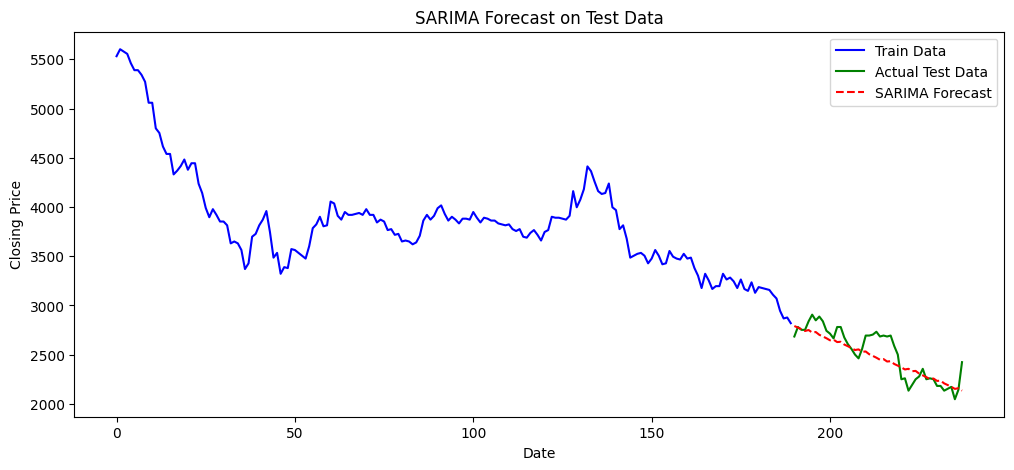

In [20]:
test_forecast = sarima_fit.forecast(steps=len(test))

# Evaluasi performa model
mae = mean_absolute_error(test["Close"], test_forecast)
rmse = np.sqrt(mean_squared_error(test["Close"], test_forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Tambahkan hasil forecast ke dataframe test
test["Forecast_SARIMA"] = test_forecast

plt.figure(figsize=(12,5))
plt.plot(train["Close"], label="Train Data", color="blue")
plt.plot(test["Close"], label="Actual Test Data", color="green")
plt.plot(test["Forecast_SARIMA"], label="SARIMA Forecast", linestyle="dashed", color="red")
plt.legend()
plt.title("SARIMA Forecast on Test Data")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


didapatkan hasil untuk model SARIMA (p, d, q, m) PT Semen Indonesia (Persero) Tbk (SMGR.JK): <br> <br>
**Mean Absolute Error (MAE): 110.46** <br>
**Root Mean Squared Error (RMSE): 140.17** <br> <br>
dikarenakan hasil MAE dan RMSE model SARIMA lebih kecil dibandingkan model ARIMA maka model **SARIMA lebih akurat**

### df_xl axiata

#### ARIMA (p, q) = (2, 7)

In [22]:
df_xlmodel = df_xl.copy()  

# Split data 80% training, 20% testing
train_size = int(len(df_xlmodel) * 0.8)
trainxl, testxl = df_xlmodel[:train_size], df_xlmodel[train_size:]

print(f"Train size: {len(trainxl)}, Test size: {len(testxl)}")

Train size: 190, Test size: 48


menggunakan q=7, karena sejauh saya mencoba hasil MAE dan RMSE yang paling kecil yakni saat  q=7

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  190
Model:                 ARIMA(2, 0, 7)   Log Likelihood                -949.281
Date:                Fri, 06 Jun 2025   AIC                           1920.563
Time:                        22:43:17   BIC                           1956.280
Sample:                             0   HQIC                          1935.031
                                - 190                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2170.1148     18.190    119.302      0.000    2134.463    2205.767
ar.L1          1.8864      0.060     31.184      0.000       1.768       2.005
ar.L2         -0.9133      0.057    -16.052      0.0

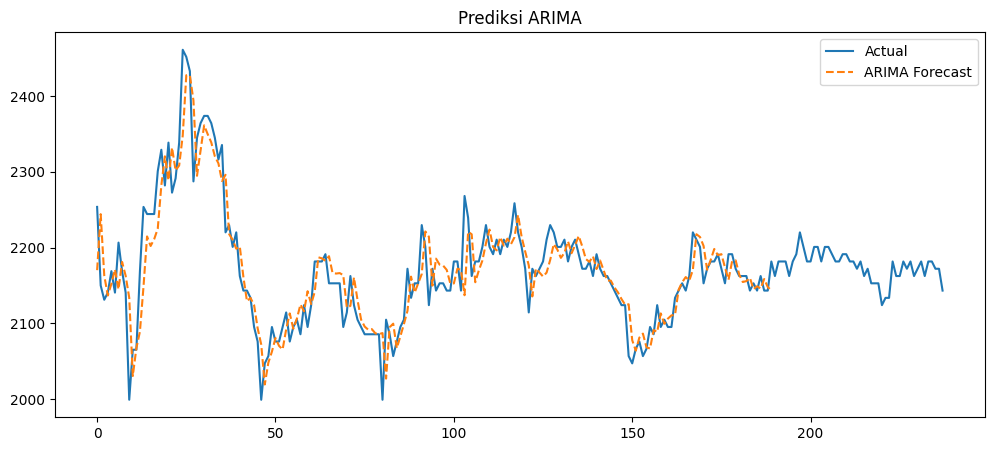

In [23]:
model = ARIMA(trainxl["Close"], order=(2,0,7))
model_fit = model.fit()

print(model_fit.summary())

df_xlmodel["Forecast_ARIMA"] = model_fit.fittedvalues

plt.figure(figsize=(12,5))
plt.plot(df_xlmodel["Close"], label="Actual")
plt.plot(df_xlmodel["Forecast_ARIMA"], label="ARIMA Forecast", linestyle="dashed")
plt.title("Prediksi ARIMA")
plt.legend()
plt.show()

forecasting untuk data test

Mean Absolute Error (MAE): 11.25
Root Mean Squared Error (RMSE): 14.14


C:\Users\USER\AppData\Local\Temp\ipykernel_6936\584546246.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testxl["Forecast_ARIMA"] = test_forecast


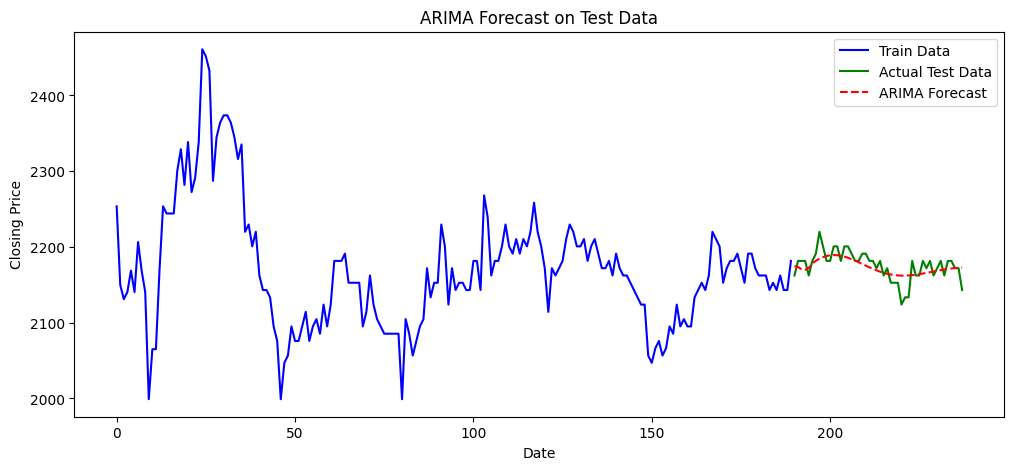

In [24]:
test_forecast = model_fit.forecast(steps=len(testxl))

# Evaluasi performa model
mae = mean_absolute_error(testxl["Close"], test_forecast)
rmse = np.sqrt(mean_squared_error(testxl["Close"], test_forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Tambahkan hasil forecast ke dataframe test
testxl["Forecast_ARIMA"] = test_forecast

plt.figure(figsize=(12,5))
plt.plot(trainxl["Close"], label="Train Data", color="blue")
plt.plot(testxl["Close"], label="Actual Test Data", color="green")
plt.plot(testxl["Forecast_ARIMA"], label="ARIMA Forecast", linestyle="dashed", color="red")
plt.legend()
plt.title("ARIMA Forecast on Test Data")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

didapatkan hasil untuk model ARIMA (p, q) pada data saham PT XL Axiata Tbk (EXCL.JK): <br> <br>
**Mean Absolute Error (MAE): 11.78** <br>
**Root Mean Squared Error (RMSE): 14.81**

### Perbandingan performance measure data testing kedua data saham

PT Semen Indonesia (Persero) Tbk (SMGR.JK) menggunakan SARIMA: <br>
**Mean Absolute Error (MAE): 110.46** <br>
**Root Mean Squared Error (RMSE): 140.17** <br> <br>

PT XL Axiata Tbk (EXCL.JK) menggunakan ARIMA: <br>
**Mean Absolute Error (MAE): 11.78** <br>
**Root Mean Squared Error (RMSE): 14.81**<br> <br>
didapatkan nilai MAE dan RMSE pada data saham PT XL Axiata Tbk (EXCL.JK) lebih kecil dibandingkan data saham PT Semen Indonesia (Persero) Tbk (SMGR.JK). Hal ini menunjukkan model yang digunakan untuk forecasting pada data PT XL Axiata Tbk (EXCL.JK) lebih akurat